In [24]:
import numpy as np
from random import seed
from random import randrange
from random import random
seed(22)

In [25]:
#a lot of code borrowed from online sources but thoroughly reviewed
def gini_index(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

In [26]:
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

In [27]:
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {"index":b_index, "value":b_value, "groups":b_groups}

In [28]:
dataset = []
for i in range(0,200):
    a = random()*20
    b = random()*20
    c = 0
    if( (a<=7 and b<=7) or (a>=13 and b>=13) ):
        c=1
    dataset.append([a,b,c])

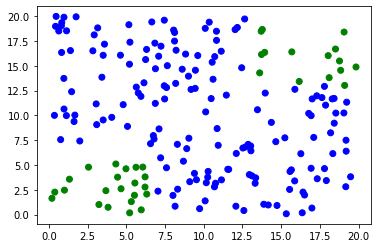

In [29]:
import matplotlib.pyplot as plt

data_plot = np.array(dataset)
data_plot.shape

colors = ["green" if label ==1 else "blue" for label in data_plot[:,2]]
plt.scatter(data_plot[:,0], data_plot[:,1], color=colors)

In [30]:
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key = outcomes.count)

In [31]:
def split(node, max_depth, min_size, depth):
    
    left, right = node["groups"]
    del(node["groups"])
    
    if not left or not right:
        node["left"] = node["right"] = to_terminal(left + right)
        return
    
    if depth >= max_depth:
        node["left"], node["right"] = to_terminal(left), to_terminal(right)
        return
    
    if len(left) <= min_size:
        node["left"] = to_terminal(left)
    else:
        node["left"] = get_split(left)
        split(node["left"], max_depth, min_size, depth+1)
    
    if len(right) <= min_size:
        node["right"] = to_terminal(right)
    else:
        node["right"] = get_split(right)
        split(node["right"], max_depth, min_size, depth+1)
        

In [32]:
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

In [33]:
def print_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*'   ', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*'   ', node)))

In [34]:
tree = build_tree(dataset, 3, 1)
print_tree(tree)

[X1 < 6.566]
   [X2 < 7.416]
      [X1 < 3.685]
         [1]
         [1]
      [X1 < 0.472]
         [0]
         [0]
   [X2 < 13.018]
      [X1 < 19.164]
         [0]
         [0]
      [X1 < 13.609]
         [0]
         [1]


In [35]:
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

In [36]:
correct = 0
error = 0

for row in dataset:
    prediction = predict(tree, row)    
    if prediction == row[-1]:
        correct+=1
    else:
        error+=1

print("The decision tree correctly predicted: " + str(correct) + "/" + str(correct+error))

The decision tree correctly predicted: 200/200


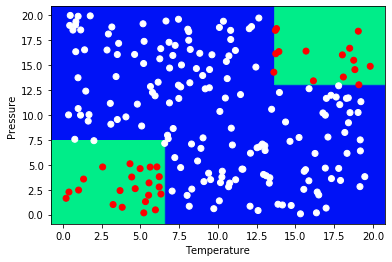

In [22]:
xmin, xmax = data_plot[:, 0].min() - 1, data_plot[:, 0].max()+1
ymin, ymax = data_plot[:, 1].min() - 1, data_plot[:, 1].max()+1
steps = 0.1
    
xx,yy = np.meshgrid(np.arange(xmin,xmax,steps), np.arange(ymin,ymax,steps))

xxx = xx.ravel()
yyy = yy.ravel()
z=[]

for i in range(0,len(xxx)):
    guess = [xxx[i],yyy[i],0]
    prediction = predict(tree,guess)
    z.append([prediction])

z = np.array(z)
z = z.reshape(xx.shape)
cs = plt.contourf(xx,yy,z,cmap = "winter")
colors = ["red" if label ==1 else "white" for label in data_plot[:,2]]
plt.scatter(data_plot[:,0], data_plot[:,1], color=colors)
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.show()